In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [24]:
df=pd.read_csv(r'E:\ProjectsFinal\DataAnalysis_Python\Project2_Bitcoin Data Analysis\Bitcoin/bitcoin_price_Training - Training.csv')

In [25]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [26]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [27]:
df.shape

(1556, 7)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [29]:
df.describe().T    # T will transpose the row and column

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


**Data PreProcessing**

**Problem Statement 1: Doing Data Pre-Processing**

In [30]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [31]:
df['Date']=df['Date'].astype('datetime64[ns]')     #converting date from object to datetime .

In [32]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [33]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [34]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [38]:
df.tail(3)

,Date,Open,High,Low,Close,Volume,Market Cap
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [39]:
data=df.sort_index(ascending=False).reset_index()  #rotate the data from 2013 .

In [40]:
data.head(3)

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [41]:
data.drop('index',axis=1,inplace=True) #drop the index column

In [42]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


**Problem Statement2: What was the change in price of the stock overtime?**

In [43]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

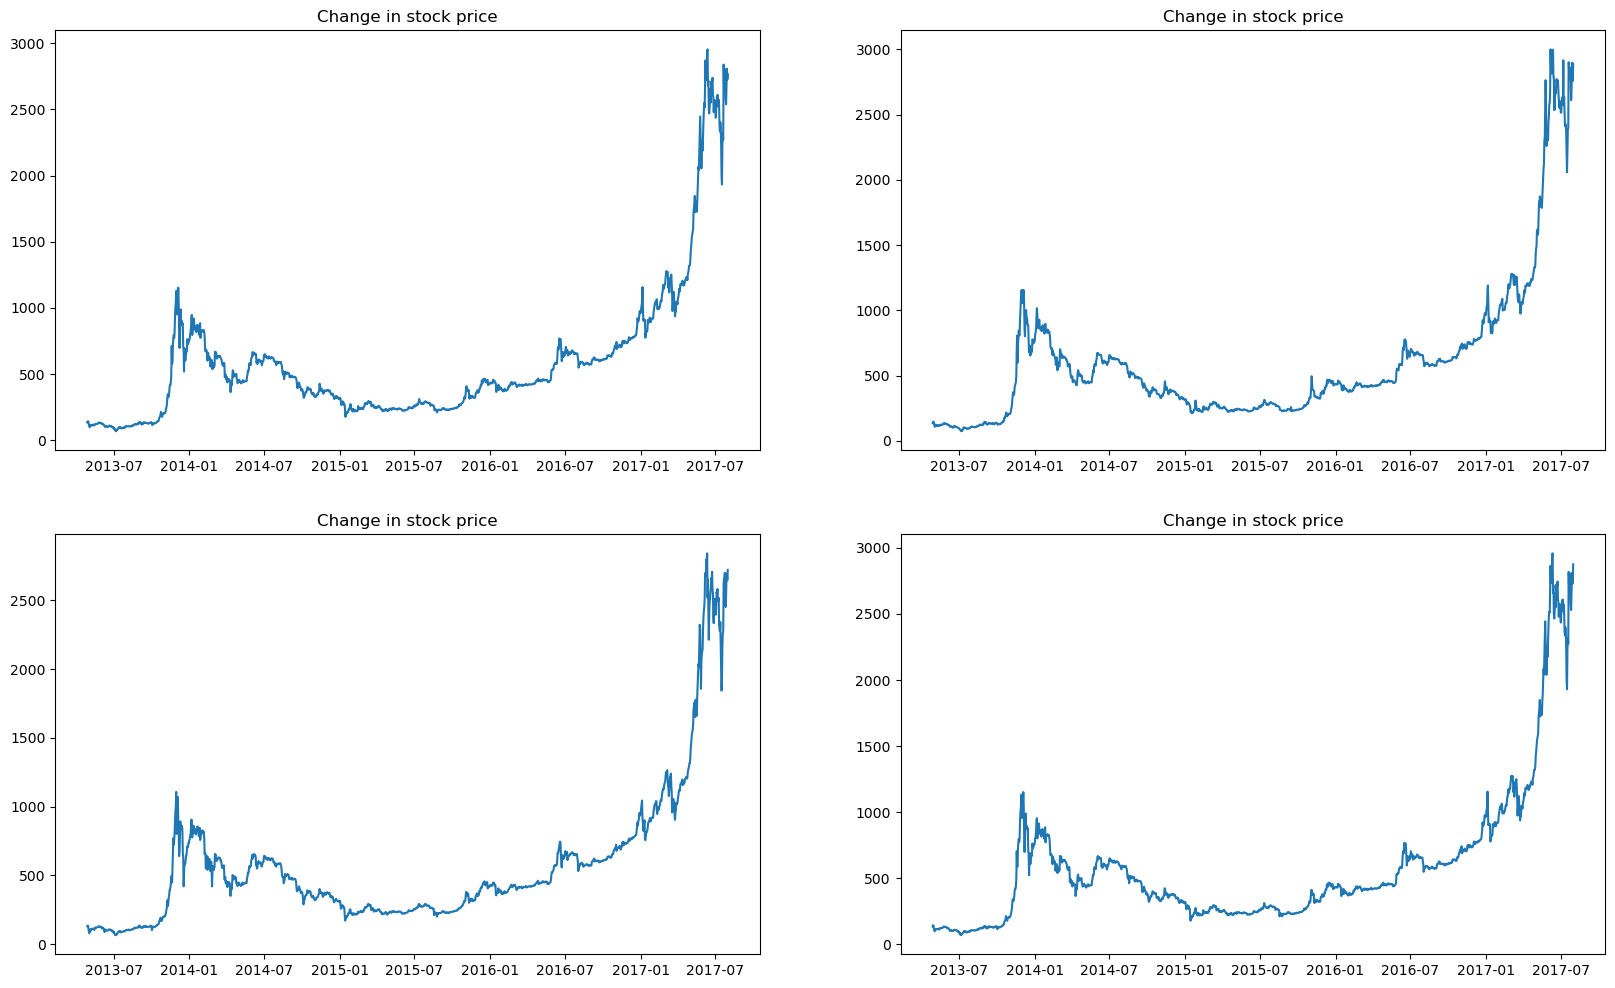

In [ ]:
plt.figure(figsize=(20,12))   #20 x ais and 12 y axis
for index,col in enumerate ([ 'Open', 'High', 'Low', 'Close'],1):    # enumerate uses index from 1
    plt.subplot(2,2,index)
    plt.plot(df['Date'], df[col])
    plt.title('Change in stock price') #title for each subplot
    

**Problem Statement3 : Analysing open ,high , low ,close value of Bitcoin**

In [44]:
data.shape

(1556, 7)

In [45]:
bitcoin_sample=data[0:50]  # taking this data for analyse 

In [46]:
import chart_studio.plotly as py #chart_studio.plotly used to create and share plots online
import plotly.graph_objs as go   # plotly.graph_objs used to create graph objects
import plotly.express as px      # plotly.express used to create various types of plots
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot   
#download_plotlyjs used to download plotly js file
#init_notebook_mode used to initialize plotly in jupyter notebook
#plot used to create plots offline
#iplot used to create interactive plots in jupyter notebook

In [47]:
init_notebook_mode(connected=True)

In [48]:
bitcoin_sample.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [49]:
trace=go.Candlestick(x=bitcoin_sample['Date'],
               high=bitcoin_sample['High'],
               open=bitcoin_sample['Open'],
               low=bitcoin_sample['Low'],
               close=bitcoin_sample['Close'])    # go.Candlestick

In [50]:
candle_data=[trace]
layout= {
              'title':'Bitcoin Historical Price',
              'xaxis':{'title':'Date'}                               # here we use title to indicate that Date is the xlabel title 
}

In [51]:
go.Figure(data=candle_data)

In [ ]:
fig=go.Figure(data=candle_data,layout=layout)    # we are adding layout to show the title and x axis 
fig.update_layout(xaxis_rangeslider_visible=False,  #xaxis_rangeslider_visible used to show or hide the range slider
                  width=1000,
                height=600 ) 
                   # to remove the slider

fig.show()           # We can use this on stock market analyse this is called ohlc chart                                     

📊 Candlestick Chart – Bitcoin Historical Price (Insight Summary)

Price moved between $79 and $147 during the selected period.

A sharp correction occurred early May, dropping nearly 46%.

After the dip, prices showed a slow recovery and upward movement.

By mid-June, the market stabilized around $100–$110, forming a consolidation zone.

**Problem Statement 4: Analysing the closing Price**

In [53]:
data['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

<Axes: >

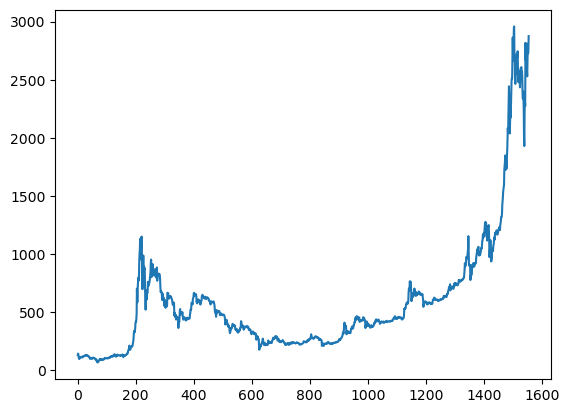

In [54]:
data['Close'].plot()

In [55]:
data.set_index('Date',inplace=True) # Setting 'Date' column as the index of the DataFrame

In [56]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<Axes: xlabel='Date'>

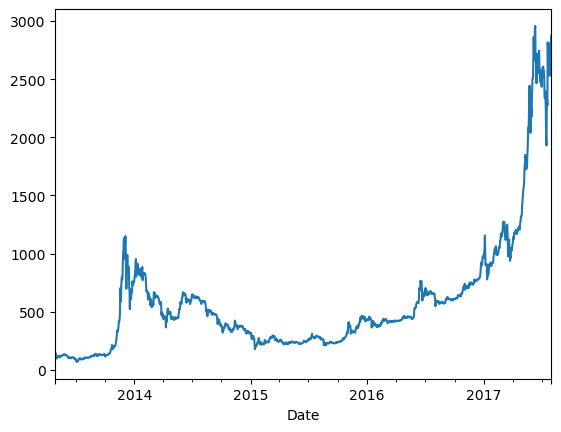

In [57]:
data['Close'].plot()   # now we have date in x-axis

In [58]:
np.log1p(data['Close'])   #we have convert the value in log

Date
2013-04-28    4.906829
2013-04-29    4.980451
2013-04-30    4.941642
2013-05-01    4.770600
2013-05-02    4.665418
                ...   
2017-07-27    7.890874
2017-07-28    7.940943
2017-07-29    7.911122
2017-07-30    7.922326
2017-07-31    7.964274
Name: Close, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

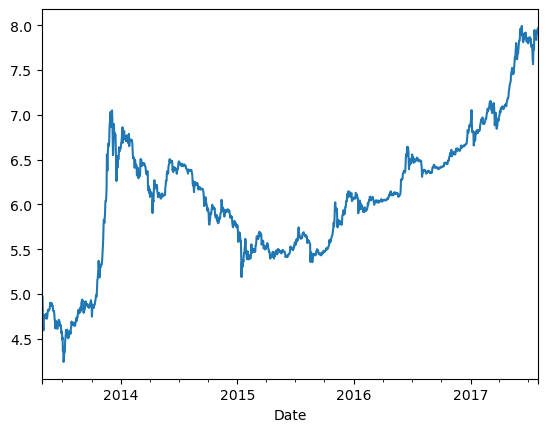

In [59]:
np.log1p(data['Close']).plot()   #now we see the plot

Text(0, 0.5, 'Log')

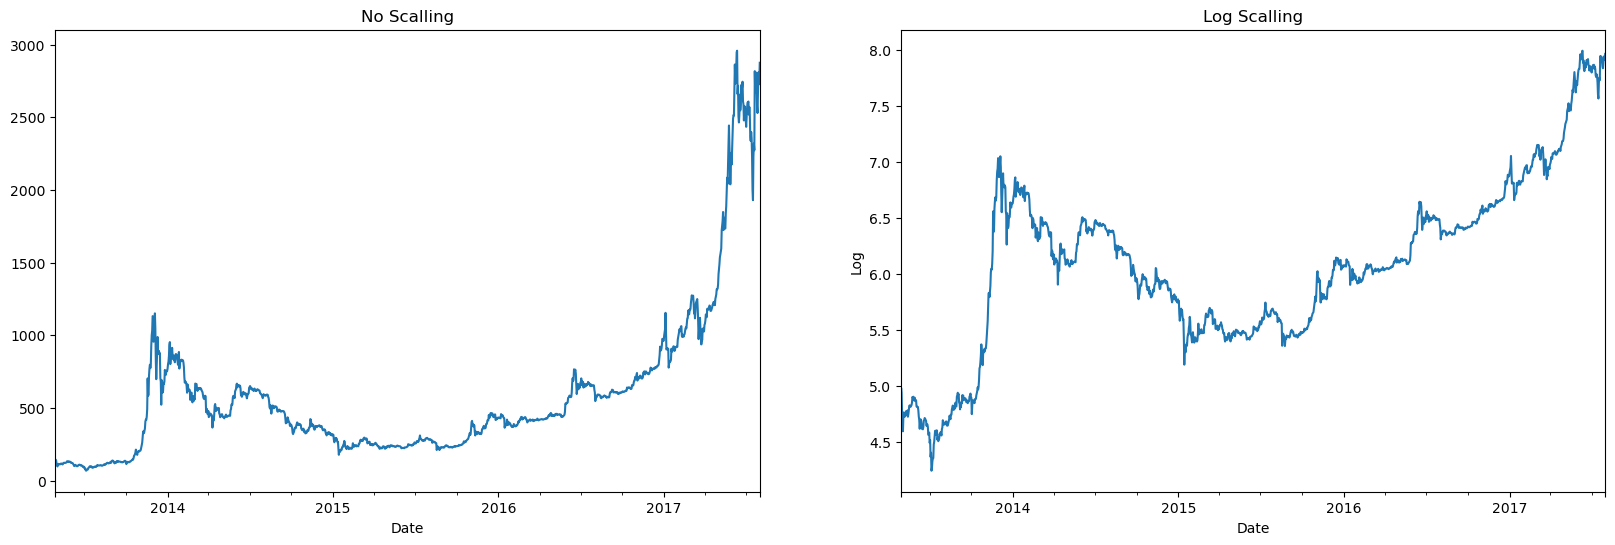

In [60]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No Scalling')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log Scalling')
plt.ylabel('Log')                            # see the both No scalling and Log plot 

🔍 Linear vs Log Scale – Closing Price Analysis (Insight Summary)

Linear scale highlights sharp movements and makes volatility look larger.

Log scale smooths the curve, showing consistent percentage-based growth.

Log view makes long-term trends easier to compare and interpret.

**Anlysing Avg closing Price on Yearly,Quarterly,monthly basis**

In [45]:
data.head()  # before resampling need to remember that data should be in row index

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [61]:
data['Close'].resample('YE').mean()   # resample the data in yearly basis

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: YE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

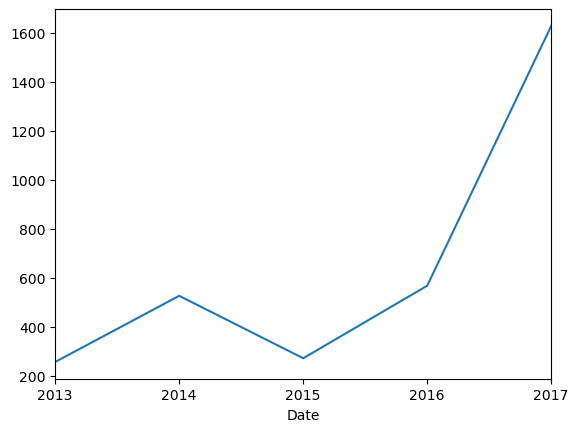

In [62]:
data['Close'].resample('YE').mean().plot()

📆 Yearly Average Closing Price (Insight Summary)

Yearly averages show strong growth over time with minimal downturns.

Long-term upward trajectory suggests increasing investor confidence.

Good for understanding big-picture market evolution.

In [ ]:
data['Close'].resample('QE').mean() # resample the data in quarterly basis

Date
2013-06-30     115.162188
2013-09-30     111.291196
2013-12-31     502.657609
2014-03-31     700.586000
2014-06-30     520.929341
2014-09-30     534.055435
2014-12-31     357.075761
2015-03-31     251.209333
2015-06-30     236.858022
2015-09-30     254.859891
2015-12-31     346.037065
2016-03-31     410.728571
2016-06-30     512.492747
2016-09-30     615.702283
2016-12-31     732.721413
2017-03-31    1034.707444
2017-06-30    1912.552198
2017-09-30    2519.418387
Freq: QE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

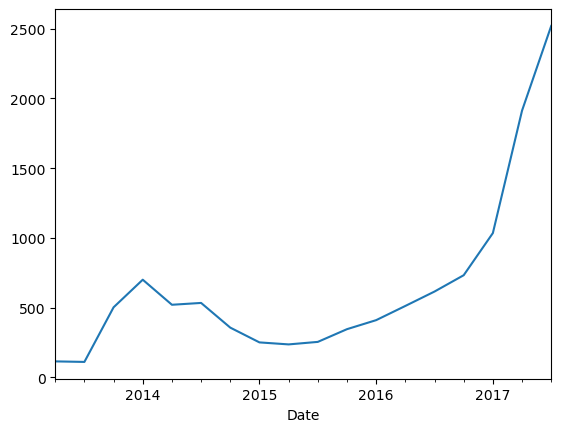

In [64]:
data['Close'].resample('QE').mean().plot()   #Quertly basis

🗓 Quarterly Average Closing Price (Insight Summary)

Quarterly data smooths noise and shows a steady long-term uptrend.

Each quarter generally builds on the previous one, reflecting sustained momentum.

Ideal for identifying macro-level market direction.

<Axes: xlabel='Date'>

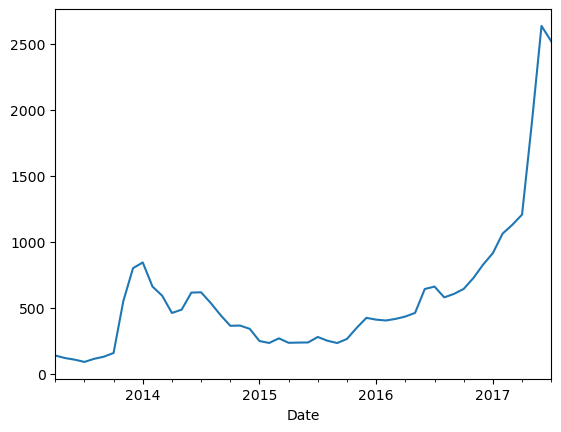

In [65]:
data['Close'].resample('ME').mean().plot()  # for Monthly basis

📅 Monthly Average Closing Price (Insight Summary)

A clear upward monthly trend indicates strong medium-term growth.

Some months show consolidation before the next rise.

The pattern signals healthy and consistent price appreciation.

**Problem Statement 6: Analysing Daily change in closing price of stocks**

In [66]:
data['Close']

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [67]:
data['close_price_pct_change']=data['Close'].pct_change()*100   #pct_change use to compute the change dailly and use % to see the % change 

In [68]:
data['close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: close_price_pct_change, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

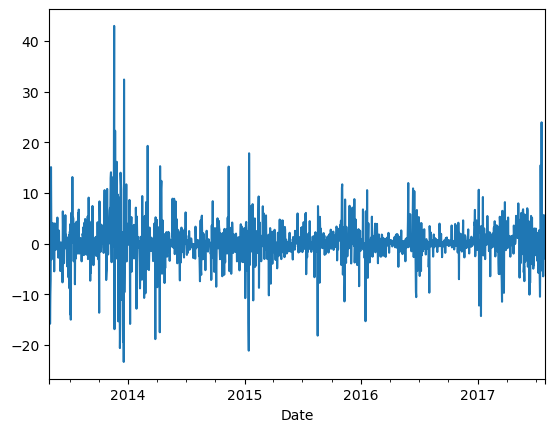

In [69]:
data['close_price_pct_change'].plot()

**use cufflinks (first need to import the same as plotly)**

In [70]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [71]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [ ]:
#!pip install cufflinks

In [ ]:
#!pip show cufflinks

Name: cufflinks
Version: 0.17.3
Summary: Productivity Tools for Plotly + Pandas
Home-page: https://github.com/santosjorge/cufflinks
Author: Jorge Santos
Author-email: santos.jorge@gmail.com
License: MIT
Location: E:\CV\Anaconda\Lib\site-packages
Requires: colorlover, ipython, ipywidgets, numpy, pandas, plotly, setuptools, six
Required-by: 


In [72]:
import cufflinks as cf

In [73]:
cf.go_offline() # to use in offline mode

In [74]:
data['close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: close_price_pct_change, Length: 1556, dtype: float64

In [75]:
data['close_price_pct_change'].isnull().sum()

1

In [76]:
data.dropna(subset=['close_price_pct_change'], inplace=True)   # as its a series so use subset 

In [77]:
data['close_price_pct_change'].isnull().sum()

0

In [78]:
type(data['close_price_pct_change'])

pandas.core.series.Series

In [79]:
fig = px.line(data, y="close_price_pct_change", title="Close Price % Change")  #  using plotly
fig.show()


📉 Daily % Change in Closing Price (Insight Summary)

Daily returns show high volatility, with frequent spikes up and down.

Most changes stay within a normal range, but occasional large swings indicate speculative trading.

The distribution suggests a market with rapid short-term reactions.

**Now for the second part creating the interective dashboard go to Spider**